<a href="https://colab.research.google.com/github/jamesqiu2021/DSCI-401-QW/blob/main/Interactive_data_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import plotly
import plotly.express as px

fig = px.line(x=["a","b","c"], y=[1,3,2], title="sample figure")
print(fig)
fig.show()

In [ ]:
fig.to_dict()

In [ ]:
#Export to html
fig.write_html("/content/example.html")
#Then download and view in browser!

In [24]:
df = px.data.iris() # replace with your own data source
fig = px.scatter(
    df, x="sepal_width", y="sepal_length", 
    color="species")
fig.show()


In [ ]:
fig.write_html("/content/iris.html")

In [ ]:
fig = dict({
    "data": [{"type": "bar",
              "x": [1, 2, 3],
              "y": [1, 3, 2]}],
    "layout": {"title": {"text": "A Figure Specified By Python Dictionary"}}
})

# To display the figure defined by this dict, use the low-level plotly.io.show function
import plotly.io as pio

pio.show(fig)

In [ ]:
fig = dict({
    "data": [{"type": "scatter",
              "x": [1, 2, 3],
              "y": [1, 3, 2]}],
    "layout": {"title": {"text": "A Figure Specified By Python Dictionary"}}
})

# To display the figure defined by this dict, use the low-level plotly.io.show function
import plotly.io as pio

pio.show(fig)

Note that the recommended alternative to working with Python dictionaries is to create entire figures at once using Plotly Express and to manipulate the resulting plotly.graph_objects.Figure objects as described in this page, wherever possible, rather than to assemble figures bottom-up from underlying graph objects.

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df, x="total_bill")
fig.show()

In [ ]:
import plotly.express as px
df = px.data.tips()
# Here we use a column with categorical data
fig = px.histogram(df, x="day")
fig.show()

# 2d histograms

In [ ]:
import plotly.express as px
df = px.data.tips()

fig = px.density_heatmap(df, x="total_bill", y="tip", nbinsx=20, nbinsy=20, color_continuous_scale="Viridis")
fig.show()

#Imshow

In [ ]:
import plotly.express as px
import numpy as np
img_rgb = np.array([[[255, 0, 0], [0, 255, 0], [0, 0, 255]],
                    [[0, 255, 0], [0, 0, 255], [255, 0, 0]]
                   ], dtype=np.uint8)
fig = px.imshow(img_rgb)
fig.show()

In [ ]:
import plotly.express as px
import xarray as xr
airtemps = xr.tutorial.open_dataset('air_temperature').air.isel(time=500)
colorbar_title = airtemps.attrs['var_desc'] + '<br>(%s)'%airtemps.attrs['units']
fig = px.imshow(airtemps, color_continuous_scale='RdBu_r', aspect='equal')
fig.show()

#3d plots

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

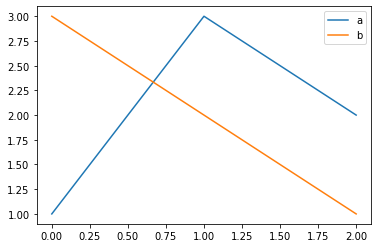

In [ ]:
import pandas as pd
pd.options.plotting.backend = "matplotlib"

df = pd.DataFrame(dict(a=[1,3,2], b=[3,2,1]))
fig = df.plot()
fig

In [ ]:
import pandas as pd
pd.options.plotting.backend = "plotly"

df = pd.DataFrame(dict(a=[1,3,2], b=[3,2,1]))
fig = df.plot()
fig.show()

In [ ]:
import pandas as pd
pd.options.plotting.backend = "plotly"
df = pd.DataFrame(dict(a=[1,3,2], b=[3,2,1]))

# using Plotly Express via the Pandas backend
fig1 = df.plot.bar()
fig1.show()

# using Plotly Express directly
import plotly.express as px
fig2 = px.bar(df)
fig2.show()

In [ ]:
import pandas as pd
pd.options.plotting.backend = "plotly"
df = pd.DataFrame(dict(a=[1,3,2], b=[3,2,1]))

fig = df.plot.bar(facet_row="variable")
fig.show()



https://plotly.com/python/pandas-backend/

Make an interactive plot that shows pass rate by month with inspection type represented by color. 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving inspections_clean.csv to inspections_clean.csv


In [7]:
import pandas as pd
import numpy as np
ins=pd.read_csv("inspections_clean.csv")
ins.head(5)

,inspection_id,dba_name,license_number,facility_type,risk,address,zip,inspection_date,inspection_type,results,violations
0,1946279,'C' A CATERING AND EVENT COMPANY,1894079,restaurant,Risk 1 (High),4300-4304 N CENTRAL AVE,60634.0,7/8/2016,canvass,Pass,NaN
1,2531309,'C' A CATERING AND EVENT COMPANY,1894079,restaurant,Risk 1 (High),4300-4304 N CENTRAL AVE,60634.0,9/14/2021,canvass,Pass w/ Conditions,16. FOOD-CONTACT SURFACES: CLEANED & SANITIZED...
2,2282674,'C' A CATERING AND EVENT COMPANY,1894079,restaurant,Risk 1 (High),4300-4304 N CENTRAL AVE,60634.0,4/5/2019,canvass,Pass,51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICE...
3,2082143,'C' A CATERING AND EVENT COMPANY,1894079,restaurant,Risk 1 (High),4300-4304 N CENTRAL AVE,60634.0,9/14/2017,canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...
4,1938102,'C' A CATERING AND EVENT COMPANY,1894079,restaurant,Risk 1 (High),4300-4304 N CENTRAL AVE,60634.0,7/6/2016,canvass,Fail,"9. WATER SOURCE: SAFE, HOT & COLD UNDER CITY P..."


In [22]:
# this is easier to be done in Python than R
ins1=ins
ins1['inspection_date'] = pd.to_datetime(ins1['inspection_date'])
ins1['year_month'] = ins1['inspection_date'].dt.strftime('%Y-%m')
ins1.head(5)
ins4=ins1
ins4['pass']=np.where(ins2.results=="Pass",1,0)
ins5=ins4.groupby(['inspection_type','year_month'],as_index=False).mean()
ins5.rename(columns = {'pass':'pass_rate'}, inplace = True)
ins5.head(5)


,inspection_type,year_month,inspection_id,license_number,zip,year,month,pass_rate
0,canvass,2010-01,99156.430851,923877.912234,60630.186170,2010.0,1.0,0.718085
1,canvass,2010-02,131326.706131,964401.786469,60627.968288,2010.0,2.0,0.780127
2,canvass,2010-03,144461.734742,985597.042254,60631.969484,2010.0,3.0,0.744131
3,canvass,2010-04,156894.811989,869044.299728,60630.378747,2010.0,4.0,0.735695
4,canvass,2010-05,195128.988212,874374.343811,60630.127701,2010.0,5.0,0.764244


In [28]:
import plotly
import plotly.express as px
fig=px.line(ins5,x='year_month',y="pass_rate",color="inspection_type")
fig.show()


In [ ]:
# this is not a good method
ins1=ins
ins1['inspection_date'] = pd.to_datetime(ins1['inspection_date'])
ins1.head(5)
ins2=ins1
# this is not needed.
ins2['year']=ins2['inspection_date'].dt.year
ins2['month']=ins2['inspection_date'].dt.month
ins2['pass']=np.where(ins2.results=="Pass",1,0)
ins3=ins2.groupby(['inspection_type','year','month'],as_index=False).mean()
ins3.rename(columns = {'pass':'pass_rate'}, inplace = True)
ins3.head(5)
